In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# Cleaning the data

## Cleaning the My Anime List Reviews dataset

In [2]:
df = pd.read_csv("myAnimeListReviews/reviews.csv")

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
df.head()

(99944, 8)


,Rating,Enjoyment,Sound,review_text,Animation,Character,Story,Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n Top\r\n ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Next
2,8,6.0,9,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,9,7.0,6,Nyanbo!
3,7,5.0,6,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6,7.0,6,Boku no Pico
4,10,10.0,10,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10,10.0,9,Kimi no Na wa.


In [4]:
df = df[["Name", "review_text", "Rating", "Story", "Animation", "Sound", "Character", "Enjoyment"]]

In [5]:
df.head()

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment
0,\r\n Top\r\n ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Next,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nyanbo!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8,6,9,9,7.0,6.0
3,Boku no Pico,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7,6,6,6,7.0,5.0
4,Kimi no Na wa.,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10,9,10,10,10.0,10.0


In [6]:
df.isnull().sum()

Name            3702
review_text     7404
Rating          7404
Story          10540
Animation      10584
Sound          11076
Character      10637
Enjoyment      11115
dtype: int64

In [7]:
df.dropna().shape

(88385, 8)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Name           0
review_text    0
Rating         0
Story          0
Animation      0
Sound          0
Character      0
Enjoyment      0
dtype: int64

In [10]:
df.dtypes

Name            object
review_text     object
Rating          object
Story           object
Animation       object
Sound           object
Character      float64
Enjoyment      float64
dtype: object

In [11]:
df[df["Story"].astype(str).map(lambda x: ',' in x)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment
14490,Toradora!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6,"5,6",6,6,7.0,8.0
14858,Akame ga Kill!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,5,"5,4",5,8,3.0,5.0
59124,Heart no Kuni no Alice: Wonderful Wonder World,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8,"1,9",10,10,10.0,9.0


In [12]:
columns = ["Rating", "Story", "Animation", "Sound"]

for col in columns:
    df = df[df[col].astype(str).map(lambda x: ',' not in x)]
    df[col] = df[col].astype(float)

In [13]:
df.dtypes, df.shape

(Name            object
 review_text     object
 Rating         float64
 Story          float64
 Animation      float64
 Sound          float64
 Character      float64
 Enjoyment      float64
 dtype: object, (88255, 8))

In [14]:
columns = ["Name", "review_text"]

for col in columns:
    df[col] = df[col].astype(str)

In [15]:
df.dtypes, df.shape

(Name            object
 review_text     object
 Rating         float64
 Story          float64
 Animation      float64
 Sound          float64
 Character      float64
 Enjoyment      float64
 dtype: object, (88255, 8))

In [16]:
col = "Name"

df[df[col].map(lambda x: type(x) is not str)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment


In [17]:
col = "review_text"

df[df[col].map(lambda x: type(x) is not str)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment


In [18]:
df.rename(columns={'review_text':'Review'}, inplace=True)

In [19]:
df.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment
2,Nyanbo!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8.0,6.0,9.0,9.0,7.0,6.0
3,Boku no Pico,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7.0,6.0,6.0,6.0,7.0,5.0
4,Kimi no Na wa.,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10.0,9.0,10.0,10.0,10.0,10.0
5,Cheonnyeon-yeowoo Yeowoobi,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6.0,6.0,7.0,5.0,7.0,6.0
6,Noragami,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7.0,7.0,10.0,10.0,7.0,7.0


In [20]:
df.dtypes, df.shape

(Name          object
 Review        object
 Rating       float64
 Story        float64
 Animation    float64
 Sound        float64
 Character    float64
 Enjoyment    float64
 dtype: object, (88255, 8))

In [21]:
df.describe()

,Rating,Story,Animation,Sound,Character,Enjoyment
count,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000
mean,7.561759,7.181723,7.935528,7.845606,7.441119,7.746247
std,2.225516,2.400374,1.830413,1.881528,2.463746,2.425485
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
df1 = df

## Cleaning the Anime News Newtwork Reviews dataset

In [23]:
df = pd.read_csv("AnimeNewsNetworkReviews/reviews.csv")

In [24]:
df.head()

,Name2,Review,Synopsis,Good_points,Ratings,Name,Bad_points
0,GN 7,"\r\n,\r\nA Silent Voice reached its climax at ...","At last, Shoya has woken up. Racing to the bri...",Maintains A Silent Voice's usual acuity of ar...,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}",A Silent Voice,"Feels a bit overlong in its resolutions, and ..."
1,DVD 1,"\r\n,\r\nTo fully and correctly appreciate 009...",In a world where the Cold War continues well p...,"Musical score, fan service.","{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",009-1,"Some character designs are appallingly ugly, ..."
2,Sub.Blu-Ray,"\r\n,\r\nWhat happens when you take twenty-sev...",Haruto can't bring himself to accept that his ...,"Some great voice work and nice animation, tri...","{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",A Town Where You Live,Story comes off melodramatic without much emo...
3,GN 6,"\r\n,\r\nIt's always an interesting experience...","Seeing Shoko about to leap off her balcony, Sh...",Doubles down on the manga's terrific characte...,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}",A Silent Voice,A couple dramatic points felt a little loosel...
4,GN 4,"\r\n,\r\nIt feels like A Silent Voice's densit...",Things continue to change little by little for...,Continues to demonstrate wondrously poignant ...,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",A Silent Voice,Some dramatic developments here could have us...


In [25]:
df = df[["Name", "Name2", "Ratings", "Synopsis", "Review" ,"Good_points", "Bad_points"]]

In [26]:
df.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","At last, Shoya has woken up. Racing to the bri...","\r\n,\r\nA Silent Voice reached its climax at ...",Maintains A Silent Voice's usual acuity of ar...,"Feels a bit overlong in its resolutions, and ..."
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",In a world where the Cold War continues well p...,"\r\n,\r\nTo fully and correctly appreciate 009...","Musical score, fan service.","Some character designs are appallingly ugly, ..."
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",Haruto can't bring himself to accept that his ...,"\r\n,\r\nWhat happens when you take twenty-sev...","Some great voice work and nice animation, tri...",Story comes off melodramatic without much emo...
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","Seeing Shoko about to leap off her balcony, Sh...","\r\n,\r\nIt's always an interesting experience...",Doubles down on the manga's terrific characte...,A couple dramatic points felt a little loosel...
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",Things continue to change little by little for...,"\r\n,\r\nIt feels like A Silent Voice's densit...",Continues to demonstrate wondrously poignant ...,Some dramatic developments here could have us...


In [27]:
df.isnull().sum()

Name            12
Name2          257
Ratings          0
Synopsis         0
Review           0
Good_points     32
Bad_points      35
dtype: int64

In [28]:
df.dtypes, df.shape

(Name           object
 Name2          object
 Ratings        object
 Synopsis       object
 Review         object
 Good_points    object
 Bad_points     object
 dtype: object, (4174, 7))

In [29]:
col = "Bad_points"

df[df[col].map(lambda x: type(x) is not str)]

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
11,Zero Time Dilemma,PS Vita,"{'Music': 'A-', 'Graphics': 'B', 'Overall': 'A...",The latest installment in Kotaro Uchikoshi's a...,"\r\n,\r\nZero Time Dilemma is a game that almo...",NaN,NaN
114,Etrian Odyssey IV: Legends of the Titan,Nintendo 3DS,"{'Music': 'A-', 'Graphics': 'A-', 'Overall': '...",The fourth Etrian Odyssey brings back most of ...,"\r\n,\r\nAnyone would be wary of a series that...",Series-standard Etrian Odyssey gameplay marri...,NaN
159,Anime,A Guide to Japanese Animation (1958-1988),{},"Soft Cover,\r\n320 pages,\r\nBlack & White,\r\...","""Anime, A guide to Japanese Animation"" was fir...",NaN,NaN
260,X TV,[ONE],"{'Animation': 'B+', 'Overall (dub)': 'B', 'Mus...","In the first volume of X, the Dragons of the E...",The long awaited X television series is finall...,NaN,NaN
273,Wolf's Rain,DVD 1: Leader of the Pack,"{'Overall (dub)': 'A-', 'Art': 'A+', 'Music': ...","In the distant future, wolves - long thought e...",Bandai certainly had a lot to crow about when ...,NaN,NaN
349,The Vision of Escaflowne,NaN,{'Overall': 'A'},Hitomi is crushed when her best friend Yukari ...,Few fans that are into fansubs at all haven't ...,NaN,NaN
358,"Vexille,\r\n, ,\r\n,\r\n, ,\r\n",NaN,"{'Animation': 'B-', 'Overall': 'C-'}","\r\n,\r\nThe dark secret of future Tokyo!\r\n,...","\r\n,\r\nWhen you sit down and decide to re-ha...",NaN,NaN
395,Vampire Hunter D 2000,NaN,{},Ten thousand years in the future Vampires rule...,The plot of Vampire Hunter D is well enough wr...,NaN,NaN
483,Tsubasa: RESERVoir CHRoNiCLE,DVD 1 - V01,"{'Animation': 'A', 'Music': 'A', 'Overall': 'B...","\r\n,\r\nWhen Syaoran and Sakura discover a se...","\r\n,\r\nBeginning in an alternate universe kn...",NaN,NaN
791,Tenchi Muyo Movie 1,DVD - Tenchi in Love,"{'Music': 'A', 'Overall (dub)': 'B', 'Overall'...",After finally getting used to having so many w...,Tenchi Muyo! is a comedy/action series that be...,NaN,NaN


In [30]:
df2 = df #not much cleaning needed

# Preprocessing the text data and the ratings data

## Preprocessing text

In [31]:
from nltk import word_tokenize

def preprocess_text(text):
    if not pd.isnull(text):
        text = re.sub(r'\n|\t|\r', r' ', text, flags = re.DOTALL) #removing \n, \t and \r
        text = re.sub(r' +', r' ', text) #multiple spaces to one space
        text = word_tokenize(text)   
    
    return text

In [32]:
print( preprocess_text(df1.loc[5, "Review"]) )

['I', 'really', 'wanted', 'to', 'like', 'this', 'movie', '.', 'I', 'really', 'really', 'did', '.', 'It', 'has', 'all', 'the', 'ingredients', 'I', 'like', '.', 'Fantasy/magic', ',', 'an', 'isolated', 'character', 'interacting', 'with', 'the', "'Real", 'World', "'", 'for', 'the', 'first', 'time', ',', 'a', 'mix', 'of', 'comedy', '(', 'slapstick', 'and', 'cerebral', ')', ',', 'drama', ',', 'aliens', ',', 'and', 'a', 'ghost', 'sink', '.', 'I', 'do', "n't", 'know', 'if', 'it', 'was', 'the', 'subtle', 'differences', 'between', 'Korean', 'and', 'Japanese', 'animation', 'that', 'threw', 'me', ',', 'or', 'the', 'fact', 'that', 'they', 'tried', 'to', 'stuff', 'a', 'full', ',', '12', 'episode', 'TV', 'series', '(', '~288', 'minutes', ')', 'into', 'an', '80', 'minute', 'movie', '.', 'All', 'I', 'know', 'is', 'that', 'this', 'movie', 'did', "n't", 'click', 'for', 'me', '.', 'Taken', 'separately', ',', 'each', 'of', 'the', 'plot', 'devices', 'are', 'great', '.', 'The', 'problem', 'I', 'had', 'was', 

In [33]:
print( preprocess_text(df2.loc[5, "Review"]) )

['I', 'normally', 'regard', 'Yoshiaki', 'Kawajiri', 'as', 'being', 'generally', 'overhyped', 'when', 'it', 'comes', 'to', 'anime', 'directors', '.', 'I', 'was', "n't", 'overly', 'enamored', 'with', 'Ninja', 'Scroll', '.', 'Demon', 'City', 'Shinjuku', 'and', 'Cyber', 'City', 'Oedo', '808', 'were', 'entertaining', ',', 'but', 'ultimately', 'mind', 'candy', '.', 'Birdy', 'the', 'Mighty', 'was', 'pretty', 'fun', ',', 'and', 'Wicked', 'City', 'was', 'too', ',', 'in', 'an', 'entirely', 'different', 'way', '.', 'We', 'shall', 'not', 'mention', 'the', '``', 'Satanica', "''", 'pilot', '.', 'And', 'then', 'there', "'s", 'A', 'Wind', 'Named', 'Amnesia', ':', 'a', 'total', 'gem', 'from', 'a', 'director', 'with', 'a', 'very', 'spotty', 'record.', ',', ',', 'There', "'s", 'not', 'too', 'much', 'story', 'here', ',', 'but', 'that', "'s", 'OK', '--', 'this', 'is', "n't", 'about', 'a', 'story', ',', 'this', 'is', 'about', 'people', ',', 'and', 'what', 'really', 'motivates', 'them', '.', 'While', 'the', 

In [34]:
df1["Review"] = df1["Review"].map(preprocess_text)

In [35]:
df1.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment
2,Nyanbo!,"[I, usually, don´t, watch, this, kind, of, ani...",8.0,6.0,9.0,9.0,7.0,6.0
3,Boku no Pico,"[Good, work, ., Seriously, ., Children, 's, se...",7.0,6.0,6.0,6.0,7.0,5.0
4,Kimi no Na wa.,"[There, 's, a, lot, of, shows, and, movies, no...",10.0,9.0,10.0,10.0,10.0,10.0
5,Cheonnyeon-yeowoo Yeowoobi,"[I, really, wanted, to, like, this, movie, ., ...",6.0,6.0,7.0,5.0,7.0,6.0
6,Noragami,"[I, think, its, pretty, obvious, where, the, f...",7.0,7.0,10.0,10.0,7.0,7.0


In [36]:
columns = ["Synopsis", "Review" ,"Good_points", "Bad_points"]

for col in columns:
    df2[col] = df2[col].map(preprocess_text)

In [37]:
df2.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","[At, last, ,, Shoya, has, woken, up, ., Racing...","[,, A, Silent, Voice, reached, its, climax, at...","[Maintains, A, Silent, Voice, 's, usual, acuit...","[Feels, a, bit, overlong, in, its, resolutions..."
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...","[In, a, world, where, the, Cold, War, continue...","[,, To, fully, and, correctly, appreciate, 009...","[Musical, score, ,, fan, service, .]","[Some, character, designs, are, appallingly, u..."
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...","[Haruto, ca, n't, bring, himself, to, accept, ...","[,, What, happens, when, you, take, twenty-sev...","[Some, great, voice, work, and, nice, animatio...","[Story, comes, off, melodramatic, without, muc..."
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","[Seeing, Shoko, about, to, leap, off, her, bal...","[,, It, 's, always, an, interesting, experienc...","[Doubles, down, on, the, manga, 's, terrific, ...","[A, couple, dramatic, points, felt, a, little,..."
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}","[Things, continue, to, change, little, by, lit...","[,, It, feels, like, A, Silent, Voice, 's, den...","[Continues, to, demonstrate, wondrously, poign...","[Some, dramatic, developments, here, could, ha..."


## Preprocessing ratings

In [38]:
import ast

ratings = df2["Ratings"].copy()
ratings = ratings.map(ast.literal_eval)

In [39]:
# getting all paris e.g ("Animation, A-)
all_pairs_ratings = [(name, rating) for rating in ratings
                                    for name, rating in rating.items()]

In [40]:
#getting dict e.g all_ratings["Story"] = [A, B-, C, A, ...]
from collections import defaultdict

all_ratings = defaultdict(list)

for name, rating in all_pairs_ratings:
    all_ratings[name].append(rating)

In [41]:
# getting all posible values of a rating
rating_values = {value for value_list in all_ratings.values()
                       for value in value_list}
rating_values

{'A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'E-'}

In [42]:
# changing letters to numbers
rating_map = {'A' : 11, 'A+' : 12, 'A-' : 10, 'B' : 8, 'B+' : 9, 'B-' : 7, 'C' : 5, 'C+' : 6, 
              'C-' : 4, 'D' : 1, 'D+' : 2, 'D-' : 0, 'E-' : -1}

all_ratings_num = {name : pd.Series(rating_list).map(rating_map)
                               for name, rating_list in all_ratings.items()}

In [43]:
# getting most popular subjects of rating
from operator import itemgetter
sorted([(key, value.count()) for key, value in all_ratings_num.items()], key= itemgetter(1), reverse = True)

[('Art', 3828),
 ('Story', 3792),
 ('Music', 2635),
 ('Animation', 2512),
 ('Overall (sub)', 2385),
 ('Overall (dub)', 1754),
 ('Overall', 1584),
 ('Graphics', 122),
 ('Presentation', 119),
 ('Gameplay', 119),
 ('Tari Tari', 1),
 ('Dogs', 1),
 ('DBZ', 1),
 ('Kanon', 1),
 ('Butler II', 1),
 ('Ball Z', 1),
 ('Death Note', 1),
 ('Ace Attorney', 1),
 ('Bizarre Adventure', 1),
 ('FX', 1),
 ('Nazca', 1)]

In [44]:
# adding columns to the data frame
Overall = ['Overall', 'Overall (sub)', 'Overall (dub)']

def Extract_rating(dict_rating, names):
    dict_rating = ast.literal_eval(dict_rating)
    return np.mean([rating_map[value] 
                            for key, value in dict_rating.items() if key in names])

In [45]:
df2["Overall"] = df2["Ratings"].map( lambda x: Extract_rating(x, Overall))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [46]:
df2["Animation"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Animation"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [47]:
df2["Music"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Music"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [48]:
df2["Story"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Story"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [49]:
df2["Art"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Art"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [50]:
mean_overall_2 = df2["Overall"].mean()
mean_overall_2

7.723904052936312

In [51]:
df2["Above_average"] = df2["Overall"].map(lambda x: int(x > mean_overall_2) )

In [52]:
df2.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points,Overall,Animation,Music,Story,Art,Above_average
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","[At, last, ,, Shoya, has, woken, up, ., Racing...","[,, A, Silent, Voice, reached, its, climax, at...","[Maintains, A, Silent, Voice, 's, usual, acuit...","[Feels, a, bit, overlong, in, its, resolutions...",9.0,NaN,NaN,7.0,10.0,1
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...","[In, a, world, where, the, Cold, War, continue...","[,, To, fully, and, correctly, appreciate, 009...","[Musical, score, ,, fan, service, .]","[Some, character, designs, are, appallingly, u...",8.0,7.0,10.0,7.0,9.0,1
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...","[Haruto, ca, n't, bring, himself, to, accept, ...","[,, What, happens, when, you, take, twenty-sev...","[Some, great, voice, work, and, nice, animatio...","[Story, comes, off, melodramatic, without, muc...",5.0,8.0,6.0,4.0,8.0,0
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","[Seeing, Shoko, about, to, leap, off, her, bal...","[,, It, 's, always, an, interesting, experienc...","[Doubles, down, on, the, manga, 's, terrific, ...","[A, couple, dramatic, points, felt, a, little,...",11.0,NaN,NaN,11.0,10.0,1
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}","[Things, continue, to, change, little, by, lit...","[,, It, feels, like, A, Silent, Voice, 's, den...","[Continues, to, demonstrate, wondrously, poign...","[Some, dramatic, developments, here, could, ha...",10.0,NaN,NaN,11.0,8.0,1


In [ ]:
### Switching to My Anime List

In [53]:
# adding the above_average column to the df1 data frame
mean_overall_1 = df1["Rating"].mean()
mean_overall_1

7.561758540592601

In [55]:
df1["Above_average"] = df1["Rating"].map(lambda x: int(x > mean_overall_1) )

In [56]:
df1.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment,Above_average
2,Nyanbo!,"[I, usually, don´t, watch, this, kind, of, ani...",8.0,6.0,9.0,9.0,7.0,6.0,1
3,Boku no Pico,"[Good, work, ., Seriously, ., Children, 's, se...",7.0,6.0,6.0,6.0,7.0,5.0,0
4,Kimi no Na wa.,"[There, 's, a, lot, of, shows, and, movies, no...",10.0,9.0,10.0,10.0,10.0,10.0,1
5,Cheonnyeon-yeowoo Yeowoobi,"[I, really, wanted, to, like, this, movie, ., ...",6.0,6.0,7.0,5.0,7.0,6.0,0
6,Noragami,"[I, think, its, pretty, obvious, where, the, f...",7.0,7.0,10.0,10.0,7.0,7.0,0


# Exploring the data

## Ratings distributions

(<matplotlib.axes._subplots.AxesSubplot at 0x213e0bbd5f8>,)

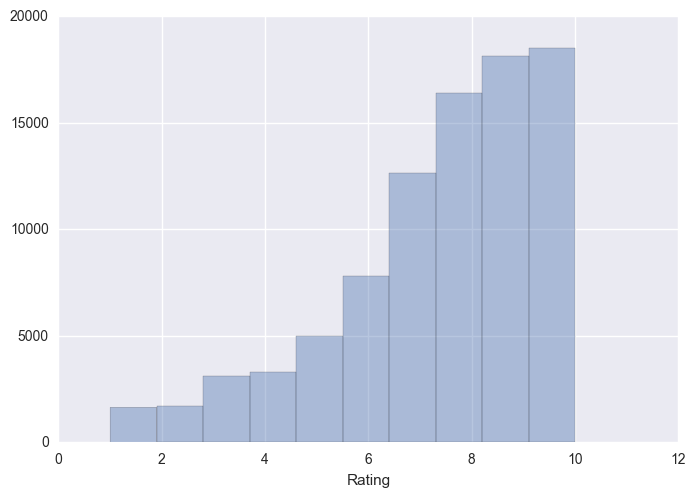

In [62]:
sns.distplot(df1["Rating"], bins = 10, kde = False)

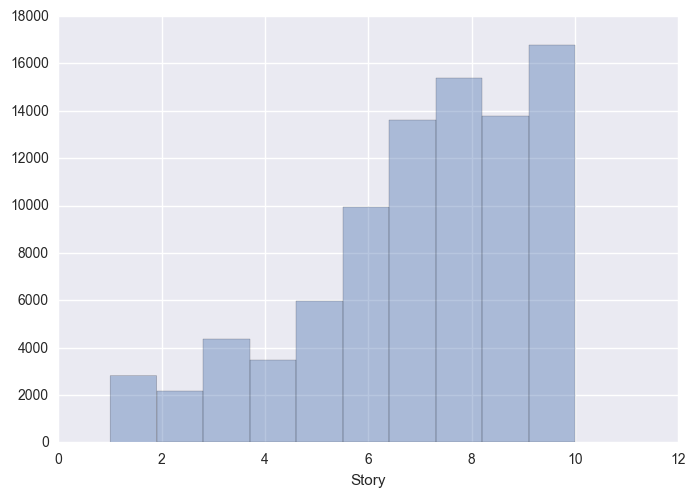

In [61]:
sns.distplot(df1["Story"], bins = 10, kde = False)

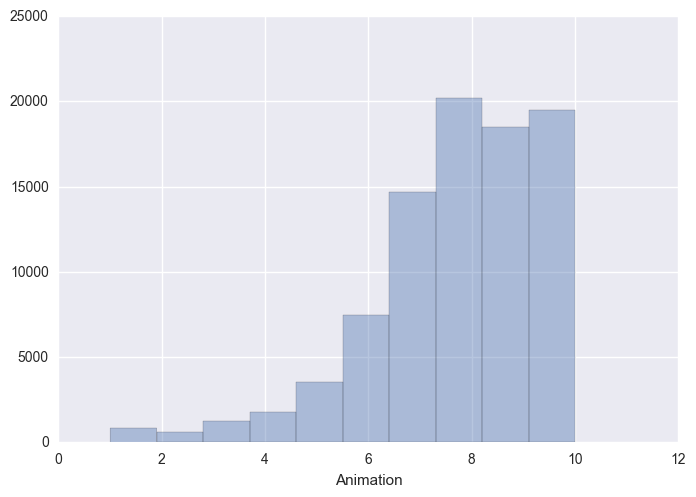

In [63]:
sns.distplot(df1["Animation"], bins = 10, kde = False)

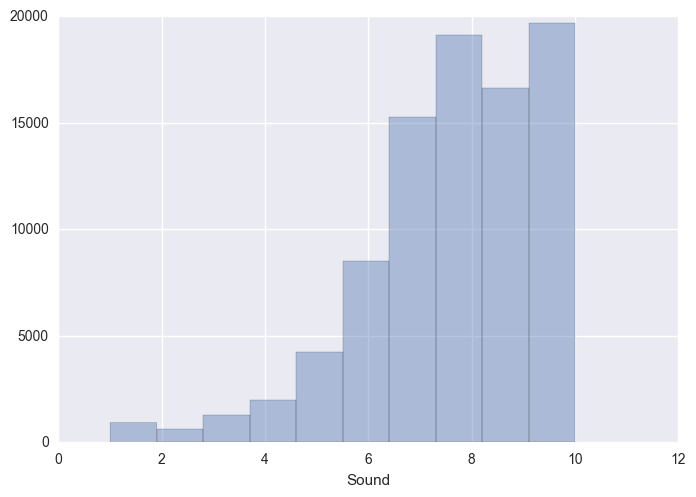

In [66]:
sns.distplot(df1["Sound"], bins = 10, kde = False)

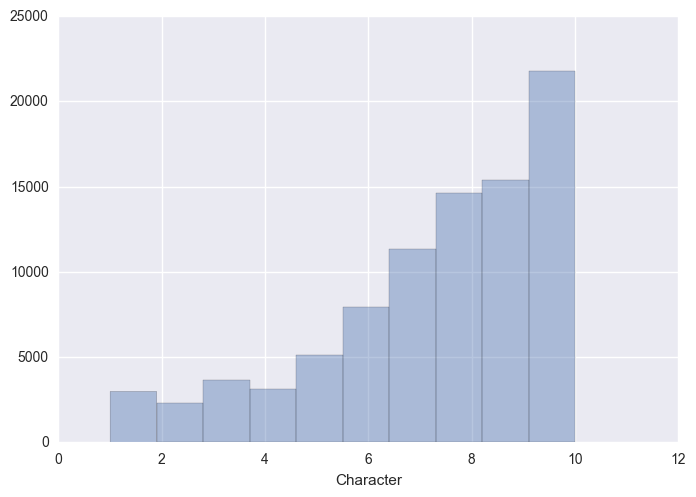

In [67]:
sns.distplot(df1["Character"], bins = 10, kde = False)

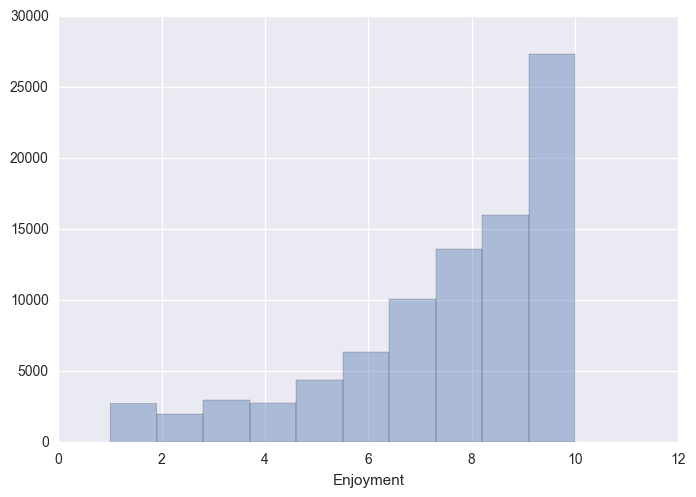

In [68]:
sns.distplot(df1["Enjoyment"], bins = 10, kde = False)

Apparently people don't generally like to write reviews with low ratings at My Anime List.

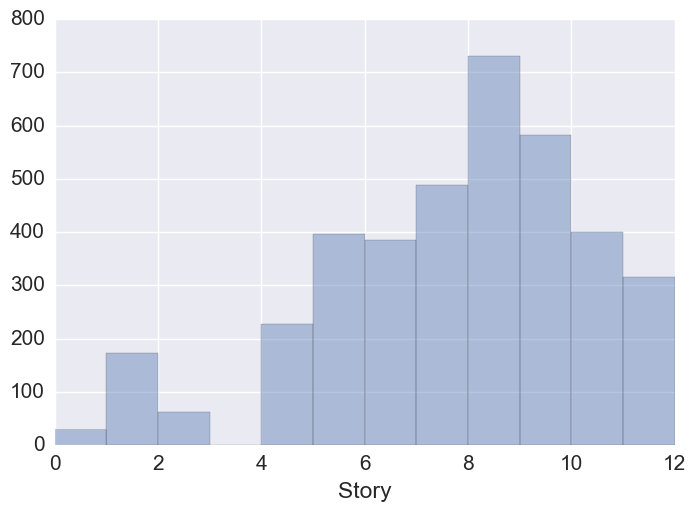

In [99]:
sns.distplot(df2["Story"].dropna(), bins = 12, kde = False)

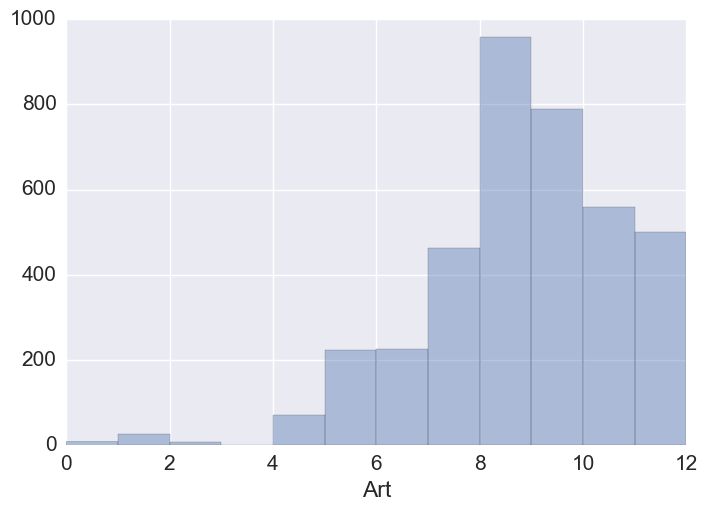

In [100]:
sns.distplot(df2["Art"].dropna(), bins = 12, kde = False)

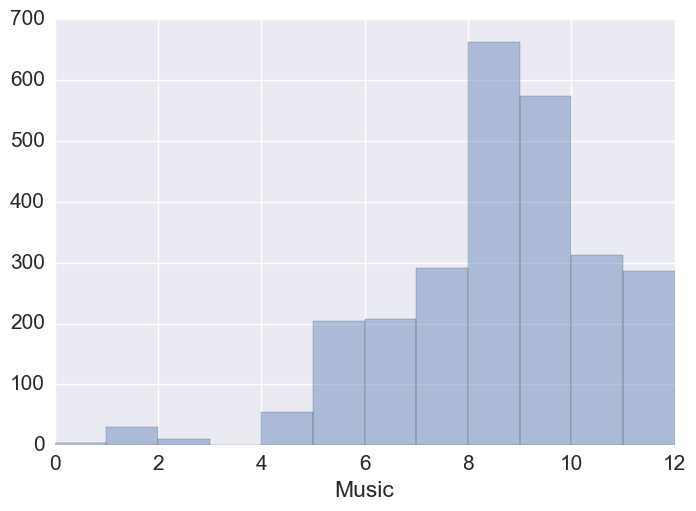

In [102]:
sns.distplot(df2["Music"].dropna(), bins = 12, kde = False)

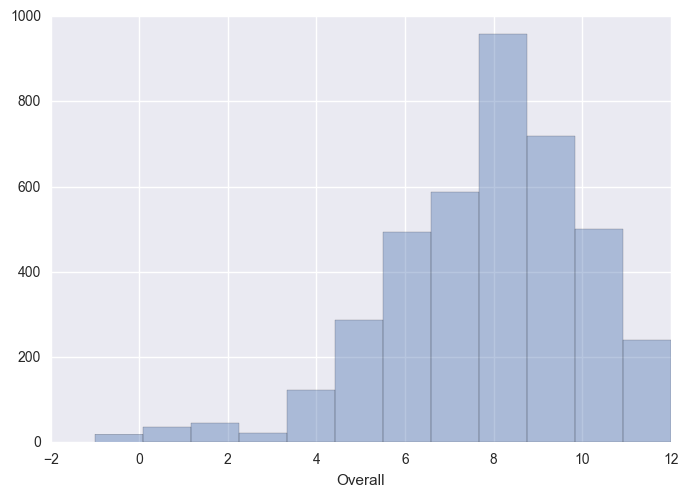

In [72]:
sns.distplot(df2["Overall"].dropna(), bins = 12, kde = False)

Reviews from Anime News Network aren't that positive. They're more balanced.

## Correlations between ratings

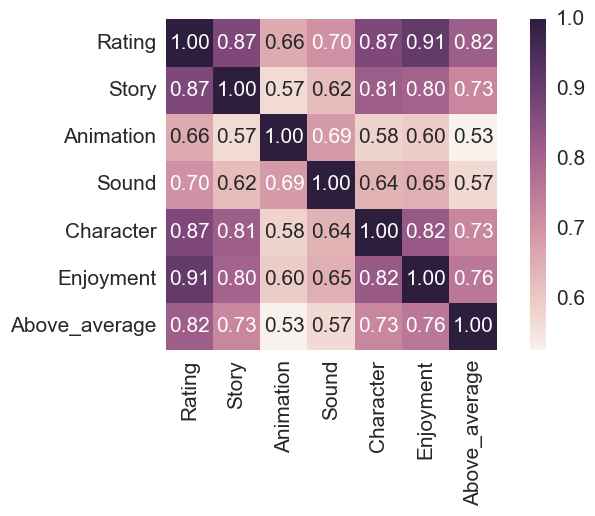

In [79]:
#My anime list
cols = ["Rating", "Story", "Animation", "Sound", "Character", "Enjoyment", "Above_average"]

import numpy as np
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

Enjoyment seems to be the most important for My Anime List users.

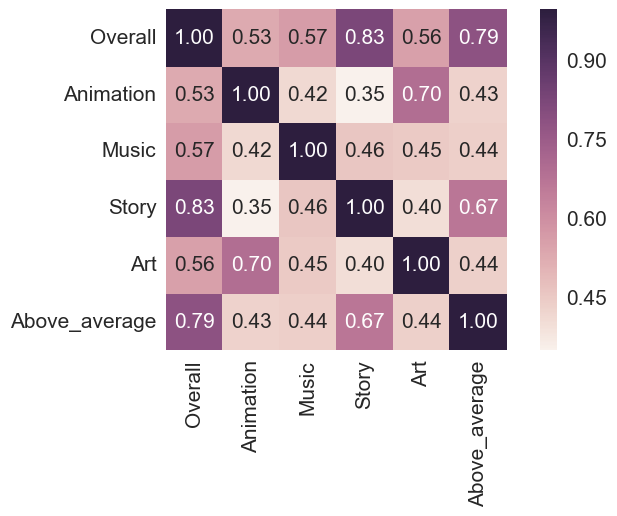

In [80]:
#Anime news netwrok
cols = ['Overall', 'Animation', 'Music', 'Story', 'Art', "Above_average"]

import numpy as np
cm = np.corrcoef(df2[cols].dropna().values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

The story seems to be the most important this time.

## Exploring the text data

In [82]:
import nltk

In [92]:
ANN_Reviews = nltk.text.TextCollection(df2["Review"])

In [95]:
ANN_Reviews.collocations()

character designs; fan service; high school; second half; English dub;
first volume; musical score; action scenes; first half; sound effects;
character development; feels like; original Japanese; English script;
Dragon Ball; voice actors; clean opener; Sailor Moon; looks like;
magical girl


hmm...

In [96]:
MyAnimeList_Reviews = nltk.text.TextCollection(df1["Review"])

In [97]:
MyAnimeList_Reviews.collocations()

character development; main character; voice acting; high school; main
characters; second season; first season; art style; 've seen; voice
actors; character designs; pretty much; even though; n't really; first
episode; fan service; well done; Death Note; ever seen; Code Geass


# Training a model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import xgboost as xb
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False, 
                        preprocessor=None)


lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])


param_grid = [{'vect__ngram_range': [(1,1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1,1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
             ]



gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, 
                           scoring='accuracy',
                           cv=5, verbose=1,
                           n_jobs=1)